In [152]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
sales=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [154]:
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [155]:
#remove unnamed bcz it will contribute to output label
sales.drop(columns="Unnamed: 0",inplace=True)

In [156]:
sales.shape

(200, 4)

In [157]:
#check for null
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [158]:
#no null is present in dataset

In [159]:
#check for dataset is balanced or not
sales["TV"].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [160]:
sales["newspaper"].value_counts()

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: newspaper, Length: 172, dtype: int64

In [161]:
sales["radio"].value_counts()

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: radio, Length: 167, dtype: int64

In [162]:
#Datas are balanced

<AxesSubplot:xlabel='TV', ylabel='sales'>

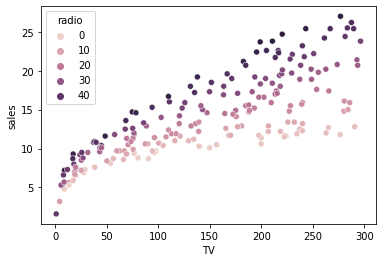

In [163]:
sns.scatterplot(x=sales["TV"],y=sales["sales"],data=sales,hue="radio")

<AxesSubplot:xlabel='radio', ylabel='sales'>

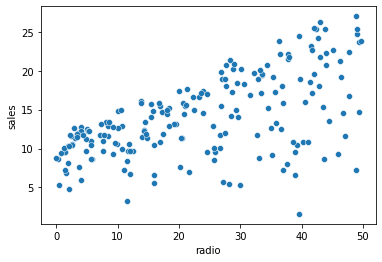

In [164]:
sns.scatterplot(x=sales["radio"],y=sales["sales"],data=sales)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

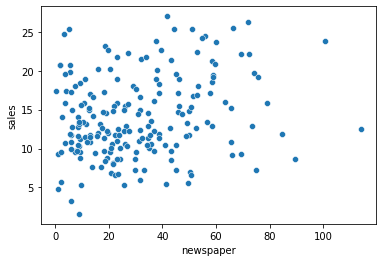

In [165]:
sns.scatterplot(x=sales["newspaper"],y=sales["sales"],data=sales)

In [166]:
#from scatterplot radio,TV conributing more to the ouput . lets check with heatmap

<AxesSubplot:>

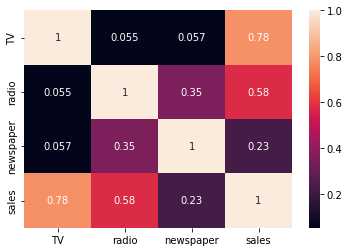

In [167]:
sns.heatmap(sales.corr(),annot=True)

In [168]:
#from map it clearly says Tv, radio contributing more compare to newspaper
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [169]:
sales["radio"].min()

0.0

In [170]:
#check datatype
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


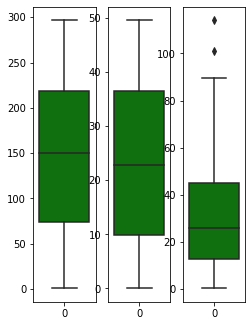

In [171]:
#No object type is present. encoding is not necessary
x=sales.drop(columns="sales")
y=sales["sales"]    
values=x.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(values)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data=sales[values[i]],orient="v",color="green")
    

In [172]:
#remove outliers
from scipy.stats import zscore

In [173]:
z=np.abs(zscore(sales))

In [174]:
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [175]:
sales=sales[(z<3).all(axis=1)]

In [176]:
sales.shape
#2 rows removed

(198, 4)

In [177]:
#check for skewness
sales.skew()


TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


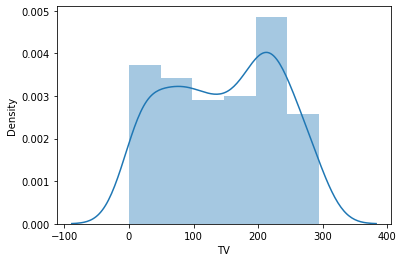

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


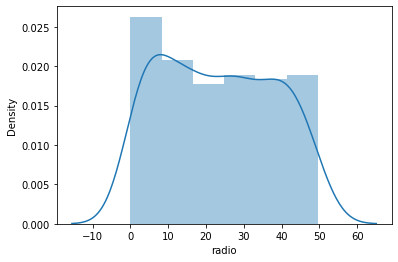

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


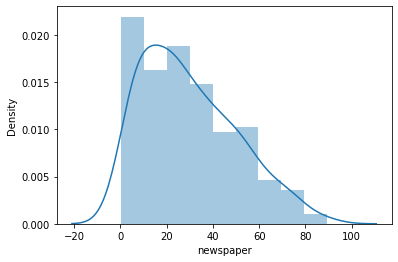

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


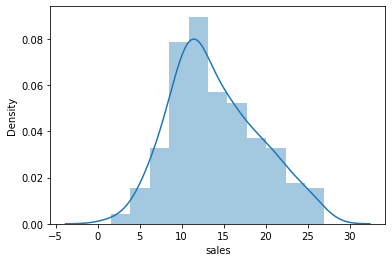

In [178]:
for i in sales.columns:
    sns.distplot(sales[i])
    plt.show()

In [179]:
#start machine learning
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20)

In [189]:
#since data is continous data we can apply linear regression
from sklearn.metrics import r2_score
lr=LinearRegression()
maxscore=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    score=r2_score(y_test,y_pred)
    
    if maxscore<score:
        maxscore=score
        print(maxscore)
        print("random state",i)
    
    
    
    

0.8927605914615384
random state 1
0.9138375011080567
random state 3
0.922433347392203
random state 6
0.9256258465335008
random state 9
0.9308589334107374
random state 13
0.9407051178510066
random state 57
0.951970719510946
random state 92
0.9526769603668497
random state 151
0.9570410648537323
random state 672


In [120]:
#at random state 672. it gives best accuracy

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=672,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_trainP=lr.predict(x_train)
score=r2_score(y_test,y_pred)



In [197]:
score

0.9570410648537323

In [200]:
#cross validation
from sklearn.model_selection import cross_val_score
trainscore=r2_score(y_predt,y_train)
testscore=r2_score(y_test,y_pred)
for i in range(2,10):
    crossval=cross_val_score(lr,x_train,y_train,cv=i)
    cvmean=crossval.mean()
    print("At cv= {}, cross mean is {},trainscore={} and testscore={}".format(i,cvmean,trainscore,testscore))
    

At cv= 2, cross mean is 0.8597856243826947,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 3, cross mean is 0.8506997142310739,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 4, cross mean is 0.8548408167013535,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 5, cross mean is 0.8375995272664291,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 6, cross mean is 0.8365025242237594,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 7, cross mean is 0.855090823259511,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 8, cross mean is 0.8476831343051368,trainscore=-0.9014630667180941 and testscore=0.9570410648537323
At cv= 9, cross mean is 0.8422889730900066,trainscore=-0.9014630667180941 and testscore=0.9570410648537323


In [ ]:
#since cross validation score have large difference will check multicolinaerity problem

In [207]:
from sklearn.linear_model import Lasso
ls=Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],'random_state':list(range(1,10))}
lsm = GridSearchCV(ls, params)

lsm.fit(x_train, y_train)

print(lsm.best_params_)
print(lsm.best_score_)


{'alpha': 1, 'random_state': 1}
0.8394562810386018


In [211]:
ls=Lasso(alpha=1,random_state=1)
lsm.fit(x_train, y_train)
pred=lsm.predict(x_test)
score=r2_score(y_test,pred)
score

0.9566767228004686

In [213]:
crossval=cross_val_score(lsm,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.8616530871136403

In [217]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [219]:



rm=RandomForestRegressor()
para={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rmG=GridSearchCV(rm,para)
rmG.fit(x_train,y_train)
rmG.best_params_

{'criterion': 'mae', 'max_features': 'auto'}

In [222]:
rm=RandomForestRegressor(criterion="mae", max_features='auto')
rmG.fit(x_train, y_train)
pred=rmG.predict(x_test)
score=r2_score(y_test,pred)
score

0.9871928552509864

In [223]:
crossval=cross_val_score(rmG,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.9352879748455274

In [230]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred=dt.predict(x_test)
score=r2_score(y_test,pred)
score

0.9733706420077327

In [231]:
crossval=cross_val_score(dt,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.8534929336563072

In [233]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
pred=kn.predict(x_test)
score=r2_score(y_test,pred)
score

0.9247979930945016

In [235]:
crossval=cross_val_score(kn,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.7652457205848913

In [237]:
#Among 5 Randomforest regressor is the best regressor
import pickle
filename="Advertisment"
pickle.dump(rmG,open(filename,"wb"))
